# 1. 数据导入方法

## 1.1 读取数据方法

In [134]:
import pandas as pd
data_train = pd.read_csv("./Titanic/train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.2 目录操作

In [7]:
import os
### (1)目录连接
ROOT_DIR = "."
titanic_dir = "Titanic"
train_file = "train.csv"
train_file_path = os.path.join(ROOT_DIR, titanic_dir, train_file)
print(train_file_path)

### (2)查看目录以及目录的目录下所有文件
for dirname, _, filenames in os.walk(os.path.join(ROOT_DIR, titanic_dir)):
    print(dirname)
    print(filenames)
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\Titanic\train.csv
.\Titanic
['gender_submission.csv', 'logistic_regression_bagging_predictions.csv', 'logistic_regression_predictions.csv', 'test.csv', 'titanic.ipynb', 'train.csv']
.\Titanic\gender_submission.csv
.\Titanic\logistic_regression_bagging_predictions.csv
.\Titanic\logistic_regression_predictions.csv
.\Titanic\test.csv
.\Titanic\titanic.ipynb
.\Titanic\train.csv
.\Titanic\.ipynb_checkpoints
['titanic-checkpoint.ipynb']
.\Titanic\.ipynb_checkpoints\titanic-checkpoint.ipynb
.\Titanic\images
[]
.\Titanic\images\titanic_explore
['Cabin有无和获救情况.png', '乘客属性分布.png', '各港口登陆乘客获救情况.png', '各等级乘客获救情况.png', '各等级舱各性别获救情况.png', '性别与获救情况.png']
.\Titanic\images\titanic_explore\Cabin有无和获救情况.png
.\Titanic\images\titanic_explore\乘客属性分布.png
.\Titanic\images\titanic_explore\各港口登陆乘客获救情况.png
.\Titanic\images\titanic_explore\各等级乘客获救情况.png
.\Titanic\images\titanic_explore\各等级舱各性别获救情况.png
.\Titanic\images\titanic_explore\性别与获救情况.png


# 2. 数据探索
    数据探索是手段，不是目的。
    数据探索的目的，是为了支撑后边的特征工程以进行更加有效的建模。
    如果你对这段数据很熟悉，完全没有必要进行什么数据探索。
 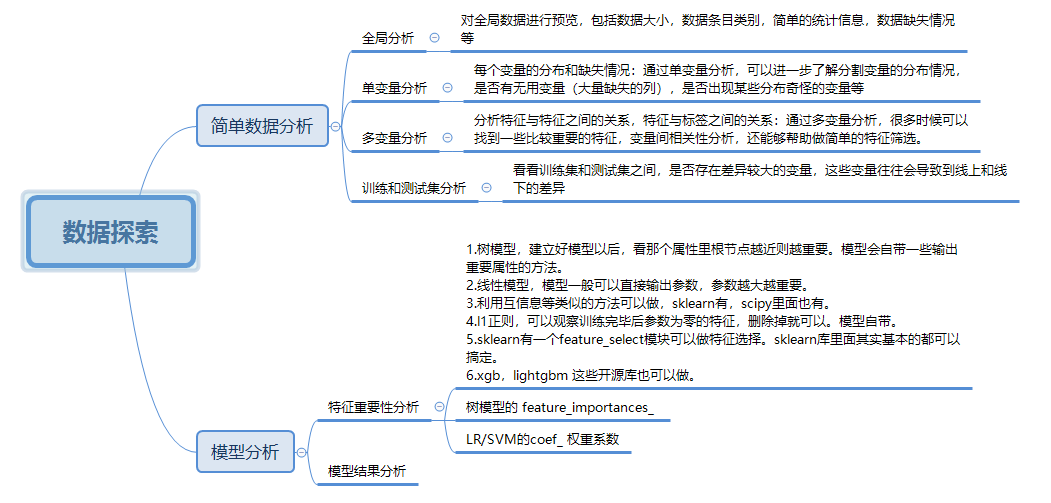

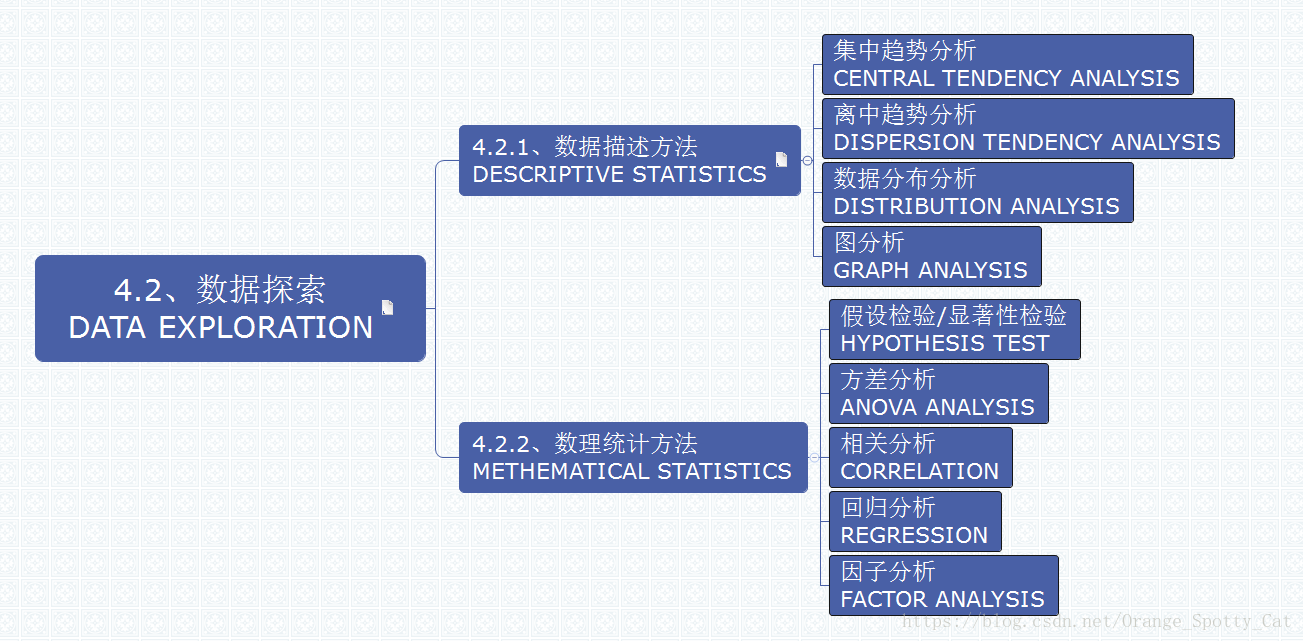

In [8]:
###(1)通过describe来看整体的统计学分布，集中趋势，离中趋势
data_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


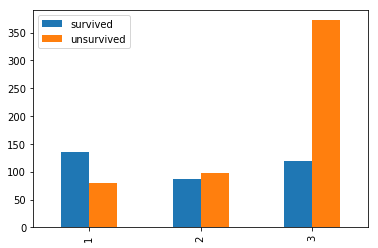

In [33]:
###（2）条形图，离散数据可以做条形图，看各类别的人数统计
import matplotlib.pyplot as plt
%matplotlib inline
sur_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
sur_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
### value_counts() 统计各类别数目
# print(sur_0)
# print(sur_1)
df = pd.DataFrame({"survived":sur_1, "unsurvived":sur_0}) ### 组成dataFrame
df.plot(kind="bar", stacked=False) ### 绘制条形图

## 2.1 多级索引参考
https://blog.csdn.net/Darkman_EX/article/details/80723802

    1. 多级索引：
      loc按标签索引，多级索引用[][]
      iloc按照index索引，多级索引，只以内侧index为准
      
https://blog.csdn.net/weixin_41100555/article/details/88555658
    2. 将series转换为DataFrame


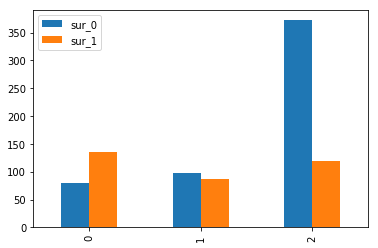

In [121]:
### (2) 条形图2，通过groupby实现条形图的绘制
group_pclass = data_train.groupby(["Survived", "Pclass"])
# group_pclass.describe()
# group_pclass.count().loc[1, 0]["PassengerId"] ## 多级索引
# print(group_pclass.count())
# group_pclass["Survived"]
sur_0 = group_pclass.count().loc[0,]["PassengerId"]  ### 使用loc多级索引
sur_0
sur_1 = group_pclass.count().iloc[3:6, 0]   ### 使用iloc多级索引
# print(type(sur_1))
data_df = pd.DataFrame({"sur_0":sur_0.values,"sur_1":sur_1.values})### 这里如果不用values，是不行的，因为他包含多级索引
data_df.plot(kind="bar", stacked=False) ### 绘制条形图

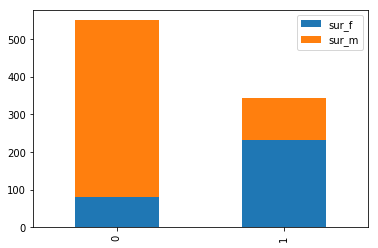

In [133]:
group_m = data_train.groupby(["Sex", "Survived"])
group_m.describe()
sur_female = group_m.count().loc["female",]["PassengerId"]
sur_female
sur_male = group_m.count().loc["male",]["PassengerId"]
data_sex = pd.DataFrame({"sur_f":sur_female.values, "sur_m":sur_male.values})
data_sex.plot(kind="bar", stacked=True)

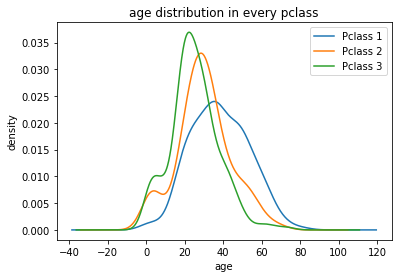

In [12]:
### (3) 密度分布图，连续型数据做密度分布图
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.ylabel("density")
plt.title("age distribution in every pclass")
plt.legend(("Pclass 1", "Pclass 2", "Pclass 3"), loc='best')
plt.show()

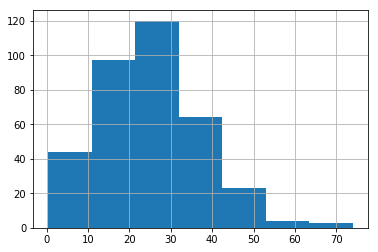

In [15]:
### (4) 直方图，统计某个区间的数量，密度图是直方图bins趋于无限大的时候所得
data_train.Age[data_train.Pclass == 3].hist(bins=7)

{'whiskers': [<matplotlib.lines.Line2D at 0x28400179f98>,
 'caps': [<matplotlib.lines.Line2D at 0x2840017a748>,
 'boxes': [<matplotlib.lines.Line2D at 0x28400188780>],
 'medians': [<matplotlib.lines.Line2D at 0x28400180e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x28400180780>],
 'means': []}

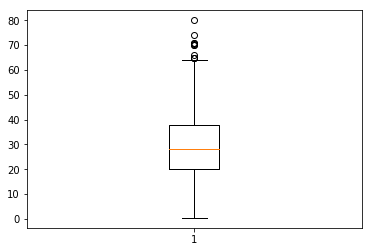

In [16]:
### (5)  箱线图，通过分位数展示数据的集中趋势
plt.boxplot(data_train.Age[pd.notnull(data_train.Age)])

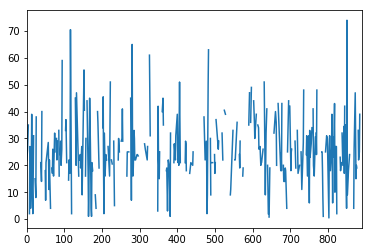

In [18]:
### （6） 折线图 反应变化趋势
### 对于数据，折线图反应年龄和序号的趋势，并无意义
data_train.Age[data_train.Pclass == 3].plot(kind='line')

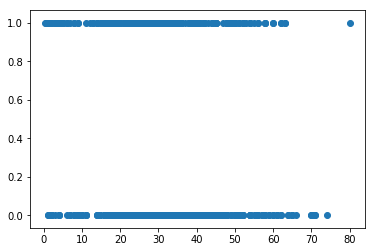

In [19]:
### （7） 散点图  也是反应变量间关系的，可以理解为折线图是散点图连线后的结果
plt.scatter(data_train.Age[pd.notnull(data_train.Age)], data_train.Survived[pd.notnull(data_train.Age)])

# 3. 数据处理
    数据处理大体分为以下几个部分：
    数据处理不仅要对训练数据进行处理，还要对测试数据进行处理。
    1. 将两者放到数组中，同时处理
    2. 定值pipeLine，流水线处理
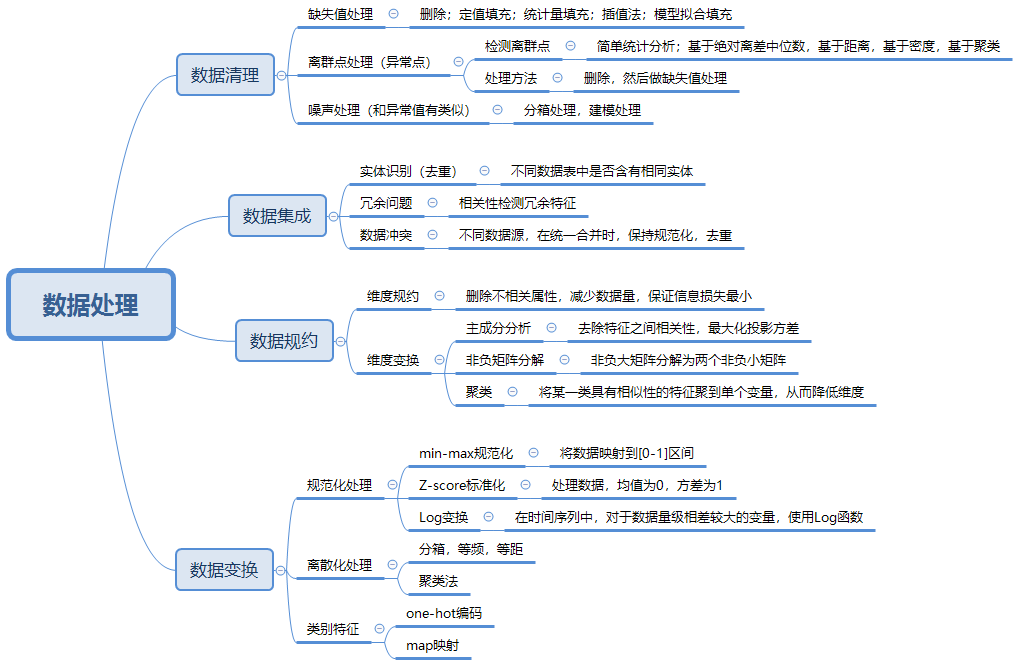

## 3.1 缺失值处理
    (1) 拟合填充
    (2) 固定值填充
    (3) 统计均值填充
    还可以使用sklearn中的imputer模块来完成

In [185]:
data_train=pd.read_csv("./Titanic/train.csv")
data_test=pd.read_csv("./Titanic/test.csv")
full_data = [data_train, data_test]
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [186]:
from sklearn.ensemble import RandomForestRegressor
### （1） 拟合填充
def regression_fill_miss_ages(df):
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']] ### 选定几个特征拟合Age
#     print(type(age_df[age_df.Age.notnull()]))
    ### 条件与判断过滤掉Fare是null的数据
    known_age = age_df[age_df.Age.notnull() & age_df.Fare.notnull()].values ### 将df转化为二维矩阵
    unknown_age = age_df[age_df.Age.isnull() & age_df.Fare.notnull()].values
    X_age = known_age[:, 1:]
    Y_age = known_age[:, 0]
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X_age, Y_age)
    predict_unknown_age = rfr.predict(unknown_age[:, 1:])
    df.loc[df.Age.isnull(), "Age"] = predict_unknown_age
    return df

In [187]:
### （2） 均值填充
def median_fill_miss_fare(df):
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())

In [188]:
### (3) 固定值填充
def fix_value_fill_Embarked(df):
    df["Embarked"] = df["Embarked"].fillna("S")

In [189]:
for df in full_data:
    regression_fill_miss_ages(df)
    median_fill_miss_fare(df)
    fix_value_fill_Embarked(df)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## 3.2 类别 数值化
    1. one-hot编码, 离散类别大小没有顺序，用one-hot
        可以单纯对某一列series,建议一列一列编码，然后合并（concat，join，merge区别）
        也可以直接对dataFrame
    2. map映射,离散类别大小有顺序，用map
    

In [200]:
### pandas get_dummies 进行one-hot编码
data_train=pd.read_csv("./Titanic/train.csv")
def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = "Yes"
    df.loc[(df.Cabin.isnull()), 'Cabin'] = 'No'
    return df
data_train.head(4)
data_train = set_Cabin_type(data_train)
dummies_cabin = pd.get_dummies(data_train["Cabin"], prefix="cabin") ### 对Cabin有无进行one-hot编码
# dummies_cabin

dummies_Sex = pd.get_dummies(data_train["Sex"], prefix="sex")

df_data_train = pd.concat([data_train, dummies_cabin, dummies_Sex], axis=1)

# df_data_train.head(4)

In [209]:
###  pandas将female 和 male map成数字
data_test=pd.read_csv("./Titanic/test.csv")
# data_test.describe(include="all") ## 可以看到并无数据缺失，418
def map_sex(df):
    map_dict = {"female":0, "male":1}
    df["Sex"] = df["Sex"].map(map_dict).astype(int)
    return df
data_test = map_sex(data_test)

## 3.3 数据 规范化
参考链接：https://www.cnblogs.com/volcao/p/9089716.html
    1. min - max 规范， 均值归一化  X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
        sklearn MinMaxScaler
    2. Z-score规范， 均方差归一化 
        sklearn  StandardScaler
 $X_scale = (x-\mu) / \sigma$
 
 fit : 先计算,可以通过属性查看
 
 
 transform：再转换
 
 
 fit_transform：计算加转换

缺失值转换后还是缺失值
    

In [215]:
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("./Titanic/test.csv")
min_max_scaler = MinMaxScaler()
# age_min_max_scale_param = min_max_scaler.fit(df["Age"].to_numpy().reshape(-1,1))
# df["min_max_scaled_age"] = min_max_scaler.transform(df["Age"].to_numpy().reshape(-1,1))
df["min_max_scaled_age"] = min_max_scaler.fit_transform(df["Age"].to_numpy().reshape(-1,1))
# df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,min_max_scaled_age
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.452723
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.617566
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.815377
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.353818
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.287881


In [222]:
import sklearn.preprocessing as preprocessing
standard_scaler = preprocessing.StandardScaler()
df=pd.read_csv("./Titanic/test.csv")
# df.describe()
fare_scale_param = standard_scaler.fit(df['Fare'].to_numpy().reshape(-1, 1))
df['Fare_scaled'] = standard_scaler.transform(df['Fare'].to_numpy().reshape(-1, 1))
###
df.describe()
df[df.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_scaled
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN


# 4. 特征工程
    特征工程需要系统学习，是一门重要知识
    本质上就两个，特征选择和特征构造
    1. 最简单的丢弃特征
    2. 构造一些新特征

## 4.1 特征选择和特征增加

In [227]:
### 丢弃特征
drop_element = ["PassengerId", "Ticket"]
data_train=pd.read_csv("./Titanic/train.csv")
data_train = data_train.drop(drop_element, axis=1)

In [229]:
### 增加特征  增加 “家庭人数” “名字长度”
data_train["FamilySize"] = data_train["SibSp"] + data_train["Parch"] + 1
data_train["Name_len"] = data_train["Name"].apply(len)
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Name_len
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,2,23
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2,51
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,1,22
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2,44
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1,24


## 4.2 特征相关性系数
使用seaborn画热力图，看特征之间的相关性，通过corr()计算相关性系数.
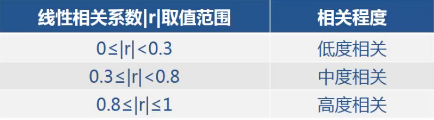
通过皮尔逊系数可以看出，各特征之间得相关性，如果各特征之间相关性很低，那么对于模型来说是很好的，说明每个特征都有其独特得信息，没有冗余。 通过观察得到Family size和Parch是具有很强得相关性得，但是这里暂时保存使用。

In [233]:
import numpy as np
import re
train=pd.read_csv("./Titanic/train.csv")
test=pd.read_csv("./Titanic/test.csv")
full_data = [train, test]
### 这不是合并，这仅仅是组成了一个dataFrame列表，方便同时处理train 和 test

# Some features of my own that I have added in
# Gives the length of the name
train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)
# Feature that tells whether a passenger had a cabin on the Titanic
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# Feature engineering steps taken from Sina
# Create new feature FamilySize as a combination of SibSp and Parch

for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
# Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Remove all NULLS in the Fare column and create a new feature CategoricalFare
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
# Create a New feature CategoricalAge
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
train['CategoricalAge'] = pd.cut(train['Age'], 5)
# Define function to extract titles from passenger names
def get_title(name):
    # 正则表达式
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
#         print(title_search.group(0))#头衔查找，输出全部
#         print(title_search.group(1))# 输出第一个
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 ;

# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)
test  = test.drop(drop_elements, axis = 1)

C:\ProgramData\Anaconda3\envs\PY3.6\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


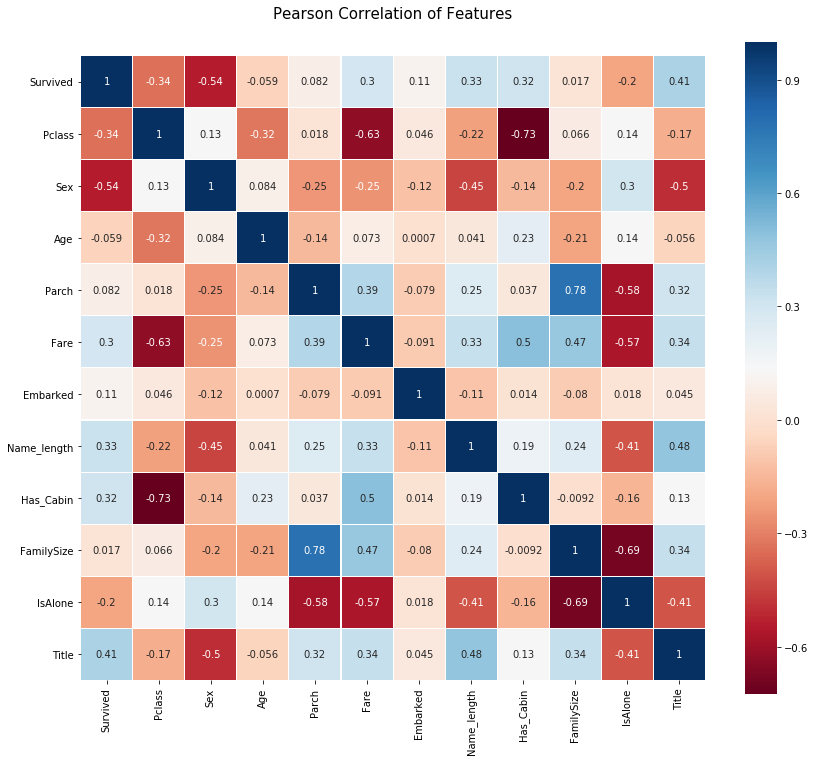

In [234]:
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)### 皮尔逊系数
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# 5. 模型选择 调参 